In [2]:
import glob
import tensorflow as tf
import numpy as np
import os
import cv2
import pickle
import random
from sklearn.model_selection import train_test_split


In [3]:
cat_dict = dict()
cat_data = []
cat_label = []
dog_data = []
dog_label = []
img_size = 50
files = glob.glob(r'F:\notes\kagglecatsanddogs_3367a\PetImages\Cat\*jpg')

In [4]:
for file in files:
    
    label = [0,1]
    img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img,(img_size,img_size))
        cat_data.append(np.array(img))
        cat_label.append(label)
    else:
        print("image not loaded")

image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded


In [5]:

files = glob.glob(r'F:\notes\kagglecatsanddogs_3367a\PetImages\Dog\*jpg')
for file in files:
    
    label = [1,0]
    img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img,(img_size,img_size))
        cat_data.append(np.array(img))
        cat_label.append(label)
    else:
        print("image not loaded")

image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded
image not loaded


In [6]:
c = list(zip(cat_data,cat_label))
random.shuffle(c)
cat_data , cat_label = zip(*c)


In [7]:
cat_data = np.array(cat_data)
cat_label = np.array(cat_label)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(cat_data,cat_label,test_size=0.3)


In [9]:
X = np.array([i for i in X_train]).reshape(-1,img_size,img_size,1)
Y = [i for i in y_train]

test_x = np.array([i for i in X_test]).reshape(-1,img_size,img_size,1)
test_y = [i for i in y_test]


In [13]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

MODEL_NAME = 'CATVSDOGGO'
LR = 1e-3

In [15]:
tf.reset_default_graph()
convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')


if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')


model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)


Training Step: 2729  | total loss: 0.33603 | time: 35.658s
| Adam | epoch: 010 | loss: 0.33603 - acc: 0.8579 -- iter: 17408/17462
Training Step: 2730  | total loss: 0.32980 | time: 37.650s
| Adam | epoch: 010 | loss: 0.32980 - acc: 0.8612 | val_loss: 0.55967 - val_acc: 0.7640 -- iter: 17462/17462
--


In [16]:
import matplotlib.pyplot as plt


In [17]:
example = X_test[:10]
example_label = y_test[:10]


In [20]:
example_label.shape


(10, 2)

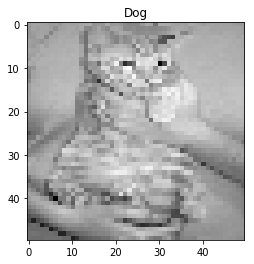

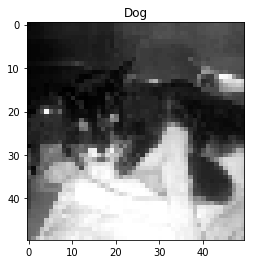

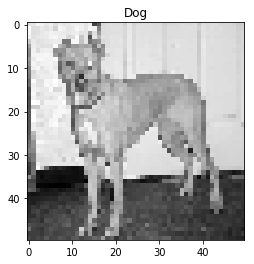

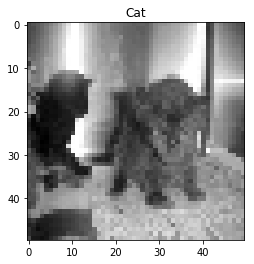

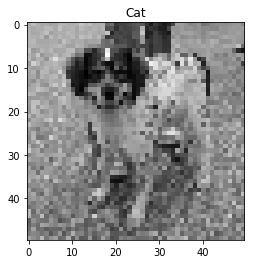

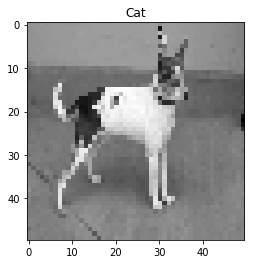

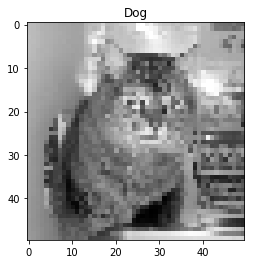

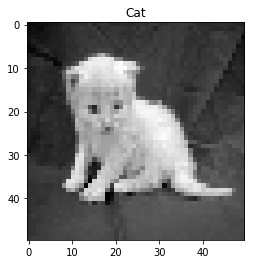

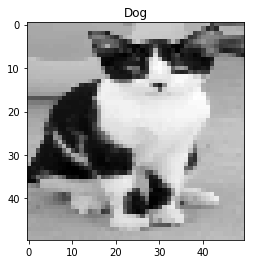

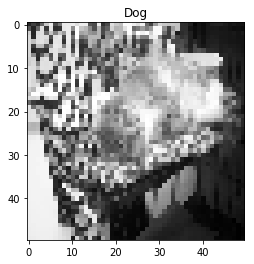

In [33]:

for num ,label in zip(example,example_label):
   
   
    
    
    data = num.reshape(img_size,img_size,1)    
    model_out = model.predict([data])
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
    orig = num
    plt.imshow(orig,cmap='gray')
    plt.title(str_label)
    

    plt.show()